# 数据处理

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from PIL import Image
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter
from random import randint
import matplotlib.pyplot as plt

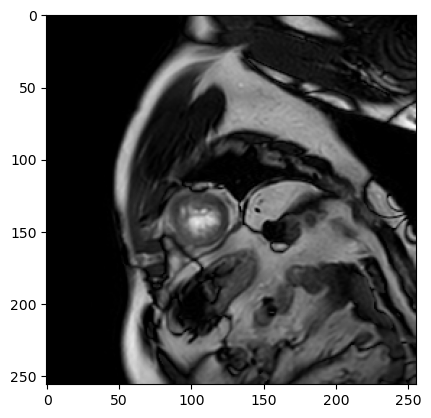

In [3]:
img = Image.open('test_norm.png')
img_as_np = np.asarray(img)
plt.imshow(img_as_np,cmap='gray')

## ceil floor image

```
    Args:
        image : numpy array of image in datatype int16
    Return :
        image : numpy array of image in datatype uint8 with ceilling(maximum 255) and flooring(minimum 0)
```

In [4]:
def ceil_floor_image(image):
    image[image > 255] = 255
    image[image < 0] = 0
    image = image.astype("uint8")
    return image

## flip

```
    Args:
        image : numpy array of image
        option_value = random integer between 0 to 3
    Return :
        image : numpy array of flipped image
```

In [5]:
def flip(image, option_value):
    if option_value == 0:
        # vertical
        image = np.flip(image, option_value)
    elif option_value == 1:
        # horizontal
        image = np.flip(image, option_value)
    elif option_value == 2:
        # horizontally and vertically flip
        image = np.flip(image, 0)
        image = np.flip(image, 1)
    else:
        image = image
        # no effect
    return image

flip {0: vertical, 1: horizontal, 2: both, 3: none}

In [6]:
flip_num = [0,1,2,3]

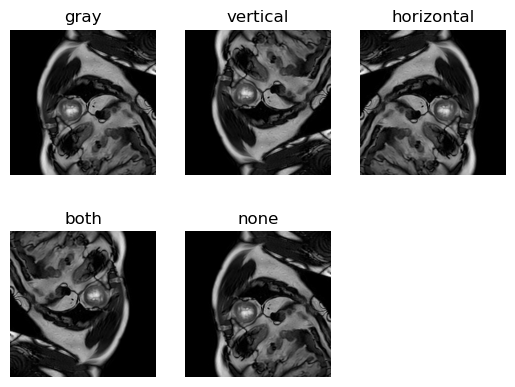

In [7]:
img_as_flip0 = flip(img_as_np, flip_num[0])
img_as_flip1 = flip(img_as_np, flip_num[1])
img_as_flip2 = flip(img_as_np, flip_num[2])
img_as_flip3 = flip(img_as_np, flip_num[3])
plt.subplot(231)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(232)
plt.imshow(img_as_flip0, 'gray')
plt.title('vertical')
plt.axis('off')
plt.subplot(233)
plt.imshow(img_as_flip1, 'gray')
plt.title('horizontal')
plt.axis('off')
plt.subplot(234)
plt.imshow(img_as_flip2, 'gray')
plt.title('both')
plt.axis('off')
plt.subplot(235)
plt.imshow(img_as_flip3, 'gray')
plt.title('none')
plt.axis('off')
plt.show()

## gaussian noise

```
    Args:
        image : numpy array of image
        mean : pixel mean of image
        standard deviation : pixel standard deviation of image
    Return :
        image : numpy array of image with gaussian noise added
```

In [8]:
def add_gaussian_noise(image, mean=0, std=1):
    gaus_noise = np.random.normal(mean, std, image.shape)
    image = image.astype("int16")
    noise_img = image + gaus_noise
    image = ceil_floor_image(image)
    return noise_img

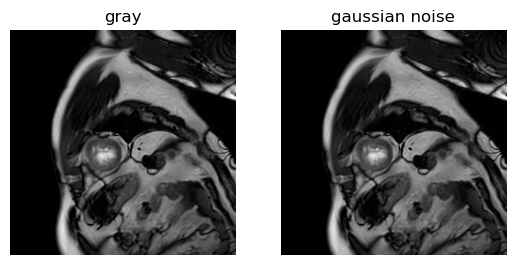

((-0.5, 255.5, 255.5, -0.5), None)

In [9]:
gaus_sd, gaus_mean = randint(0, 20), 0
img_as_gn = add_gaussian_noise(img_as_np, gaus_mean, gaus_sd)
plt.subplot(121)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_as_gn, 'gray')
plt.title('gaussian noise')
plt.axis('off'),plt.show()

## uniform noise

```
    Args:
        image : numpy array of image
        low : lower boundary of output interval
        high : upper boundary of output interval
    Return :
        image : numpy array of image with uniform noise added
```

In [10]:
def add_uniform_noise(image, low=-10, high=10):
    uni_noise = np.random.uniform(low, high, image.shape)
    image = image.astype("int16")
    noise_img = image + uni_noise
    image = ceil_floor_image(image)
    return noise_img

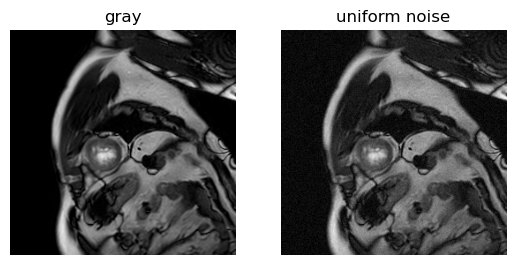

((-0.5, 255.5, 255.5, -0.5), None)

In [11]:
l_bound, u_bound = randint(-20, 0), randint(0, 20)
img_as_un = add_uniform_noise(img_as_np, l_bound, u_bound)
plt.subplot(121)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_as_un, 'gray')
plt.title('uniform noise')
plt.axis('off'),plt.show()

## change brightness

```
    Args:
        image : numpy array of image
        value : brightness
    Return :
        image : numpy array of image with brightness added
```

In [12]:
def change_brightness(image, value):
    image = image.astype("int16")
    image = image + value
    image = ceil_floor_image(image)
    return image

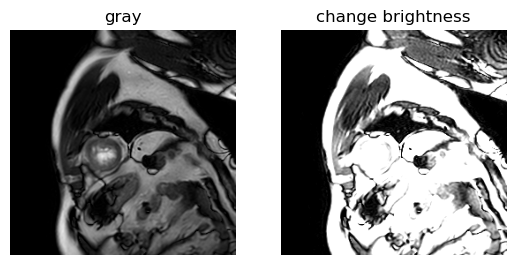

((-0.5, 255.5, 255.5, -0.5), None)

In [13]:
pix_add = 200
img_as_cb = change_brightness(img_as_np, pix_add)
plt.subplot(121)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_as_cb, 'gray')
plt.title('change brightness')
plt.axis('off'),plt.show()

## normalization

### Normalization to range of [min, max]

```
    Args :
        image : numpy array of image
        min : min of the numpy array of image
        max : max of the numpy array of image
    Return :
        image : numpy array of image with values turned into standard scores
```

In [14]:
def normalization(image, max, min):
    image_new = (image - np.min(image))*(max - min)/(np.max(image)-np.min(image)) + min
    return image_new

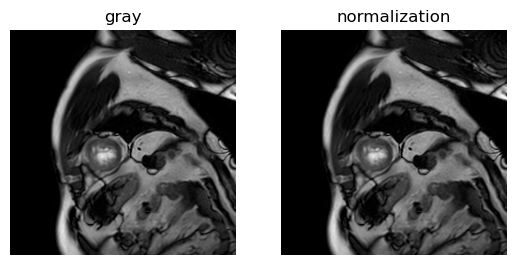

((-0.5, 255.5, 255.5, -0.5), None)

In [15]:
img_as_norm = normalization(img_as_np, max=1, min=0)
plt.subplot(121)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_as_norm, 'gray')
plt.title('normalization')
plt.axis('off'),plt.show()

### zscore

```
    Args :
        image : numpy array of image
        mean : 
    Return :
        image : numpy array of image with values turned into standard scores
```

In [16]:
def zscore(image):
    mean = np.mean(image)
    std = np.std(image)
    image_new = (image - mean) / std
    return image_new

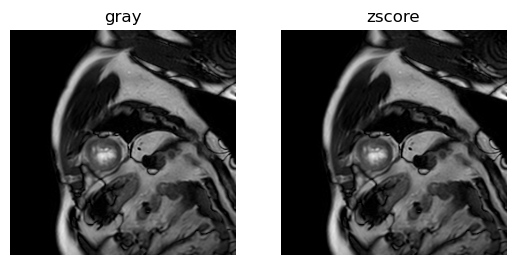

((-0.5, 255.5, 255.5, -0.5), None)

In [17]:
img_as_zscore = normalization(img_as_np, max=1, min=0)
plt.subplot(121)
plt.imshow(img_as_np, 'gray')
plt.title('gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(img_as_zscore, 'gray')
plt.title('zscore')
plt.axis('off'),plt.show()